In [180]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the dataset

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('max_rows', 6000)

##Problem Statement
Using the method of Boosting, classify whether or not the customer will churn

```
Customer churn, also known as customer attrition, customer turnover, 
or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay-TV companies, insurance firms, 
and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics 
because the cost of retaining an existing customer is far less than acquiring a new one.

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn.
Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

For this project, we will be exploring the dataset of a telecom company and try to predict the customer churn
```

In [182]:
#Feature Description
feat_desc=pd.read_excel('/content/drive/MyDrive/Telecom Churn Prediction with Boosting/Telecom Churn Prediction_Data_Dictionary.xlsx')
feat_desc

,Feature,Description
0,customerID,Customer ID
1,gender,Whether the customer is a male or a female
2,SeniorCitizen,Whether the customer is a senior citizen or no...
3,Partner,Whether the customer has a partner or not (Yes...
4,Dependents,Whether the customer has dependents or not (Ye...
5,tenure,Number of months the customer has stayed with ...
6,PhoneService,Whether the customer has a phone service or no...
7,MultipleLines,Whether the customer has multiple lines or not...
8,InternetService,"Customer’s internet service provider (DSL, Fib..."
9,OnlineSecurity,Whether the customer has online security or no...


##Load the Dataset

In [183]:
# read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Telecom Churn Prediction with Boosting/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Telecom Churn Prediction with Boosting/test.csv')

#Dropping df_train Id column : train_id
train_id = df_train['Id']
df_train.drop(['Id'], axis=1, inplace=True)

In [184]:
#First 5 rows
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7596-IIWYC,Female,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,9103-CXVOK,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No


In [185]:
# Data shape and columns

print(df_train.shape)
print(df_train.columns)

(5634, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [186]:
#Features Info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [187]:
# Describe data

df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161519,32.075790,64.671166
std,0.368042,24.492631,30.177218
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.275000
50%,0.000000,28.000000,70.350000
75%,0.000000,55.000000,90.050000
max,1.000000,72.000000,118.750000


In [188]:
#Describing categorical data - 'object'

df_train.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5275,2
top,2446-BEGGB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,2852,2894,3930,5086,2715,2485,2853,2466,2487,2804,2231,2221,3112,3343,1906,9,4120


### Visualize the data and preprocess


In [189]:
#Replacing empty value in TotalCharges
df_train['TotalCharges'].replace(' ',np.NaN, inplace=True)
df_test['TotalCharges'].replace(' ',np.NaN, inplace=True)

In [190]:
#Total Charges to float
df_train['TotalCharges']=df_train['TotalCharges'].astype(float)
df_test['TotalCharges']=df_test['TotalCharges'].astype(float)


In [191]:
# 9 Null values in TotalCharges
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [192]:
#Filling missing values in TotalCharges
df_train['TotalCharges'].fillna(df_train['TotalCharges'].mean(),inplace=True)
df_test['TotalCharges'].fillna(df_test['TotalCharges'].mean(), inplace=True)


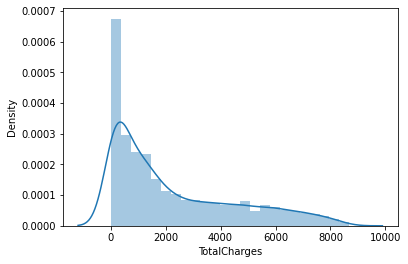

In [193]:
# TotalCharges
sns.distplot(df_train['TotalCharges'])

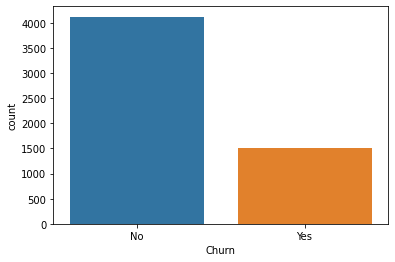

In [194]:
#Target - Churn

sns.countplot(x='Churn', data=df_train)
#Obs: Imbalanced Classes

In [195]:
# Encoding categorical variables
encoder=LabelEncoder()

#Encoding Training data
df_train['Churn'] = encoder.fit_transform(df_train['Churn'])

col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
     'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for i in col:
  df_train[i] = encoder.fit_transform(df_train[i])
  df_test[i] = encoder.fit_transform(df_test[i])


### Model building


In [196]:
#Splitting training and validation set

X=df_train.drop(['Churn','customerID'],1)

y=df_train['Churn']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0      27             1   
1       1              0        1           1       1             1   
2       0              0        0           0      17             1   
3       0              1        0           0      42             1   
4       1              0        1           0      23             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                2               1             1   
1              0                2               1             1   
2              2                1               0             0   
3              2                1               0             0   
4              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         2   
1                 

### **Using AdaBoost Classifier**

In [197]:
# Initialising AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [198]:
# Predicting the values of validation data
y_ada_pred = ada.predict(X_valid)
print("Classification report - \n", classification_report(y_valid,y_ada_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1045
           1       0.64      0.58      0.61       364

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [199]:
#Accuracy Score
accuracy_score(y_valid,y_ada_pred)

0.8055358410220014

### **Using XGBoost Classifier**

In [200]:
# Initialising AdaBoostClassifier
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [201]:
# Predicting the values of validation data
y_XGB_pred = XGB.predict(X_valid)
print("Classification report - \n", classification_report(y_valid,y_XGB_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1045
           1       0.63      0.56      0.60       364

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [202]:
#Accuracy Score
accuracy_score(y_valid,y_XGB_pred)

0.8019872249822569

### Prediction on the test data

In [203]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)

(1409, 20)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [204]:
#Features selected from test data

X_test=df_test.drop(['customerID'],1)

#make prediction : Churn - AdaBoostClassifier
y_test_pred = ada.predict(X_test)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "Churn": y_test_pred})
subm['Churn']=subm['Churn'].replace({0:'No', 1:'Yes'})
print(subm.head())

     Id Churn
0  4539    No
1  1802    No
2  1380    No
3  5305    No
4  1960    No


In [205]:
# To CSV for submission
#subm.to_csv('Telecom_Churn_submission.csv',index=False)

#from google.colab import files
#files.download('Telecom_Churn_submission.csv') 